In [1]:
import bdsf
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from bokeh import plotting
import numpy as np
plotting.output_notebook()

Loading BokehJS ...

In [2]:
sources = Table.read("interestingsources_3.txt", format='ascii' )
#len(sources)
#c = SkyCoord(str(sources[0][0]) +' '+ str(sources[0][1]), unit=(u.hourangle, u.deg))
#cord = c.to_string('decimal').split()
#float(cord[0])
sources[1][2]
#i=0
#while i<=len(sources):
#    filename = '/home/afrosamurai/AstroREU/AstroREU-2020/' + str(sources[i][2])
#    print(filename)
#    i+=1

'VLASS1.2.ql.T15t01.J001448+193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'

In [3]:
#Source finding for individual
fits = 'VLASS1.1.ql.T14t02.J004202+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
filename = '/home/afrosamurai/AstroREU/AstroREU-2020/' + fits
name = fits +'.csv'
RA = '00:42:38.77'
DEC = '+12:30:36.75'
coord = SkyCoord(RA +' '+ DEC, unit=(u.hourangle, u.deg))
tofloat = coord.to_string('decimal').split()
img = bdsf.process_image(filename, advanced_opts = True, frequency = 3e9, 
                             src_ra_dec =[(float(tofloat[0]), float(tofloat[1]))] ) 
img.write_catalog(format='csv', outfile=name, clobber=True)
data = Table.read(name, format='ascii')
peakflux=data['col11'][0]
ISLrms = data['col42'][0]

if(peakflux>ISLrms*3):
    print('YUH')

--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T14t02.J004202+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.80123e-04, 6.20341e-04, 52.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.601 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.14e-04, 1.61e-04) Jy/beam
Min/max values of background mean map ... : (-9.93e-06, 4.39e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fd

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1



--> Wrote ASCII file 'VLASS1.1.ql.T14t02.J004202+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits.csv'


In [3]:
#Soruce finding for multiple files

i=0
while i <=len(sources):
    filename = '/home/afrosamurai/AstroREU/AstroREU-2020/' + str(sources[i][2])
    name = 'fits_3_' + str(i) +'.csv'
    coord = SkyCoord(str(sources[i][0]) +' '+ str(sources[i][1]), unit=(u.hourangle, u.deg))
    tofloat = coord.to_string('decimal').split()
    try:
        img = bdsf.process_image(filename, advanced_opts = True, frequency = 3e9, 
                             src_ra_dec =[(float(tofloat[0]), float(tofloat[1]))] ) 
        img.write_catalog(format='csv', outfile=name, clobber=True)
    except ValueError:
        i+=1
        print(filename + ' caused an error!')
        continue
    print(tofloat)
    try:
        data = Table.read(name, format='ascii')
        peakflux=data['col11'][0]
        totalflux=data['col9'][0]
        ISLrms = data['col42'][0]
        sigma3rms = ISLrms*3
        if(peakflux>ISLrms*3):
            with open('promising.txt', 'a') as f:
                f.write(sources[i][2] + ' ' + coord.to_string('decimal') + ' ' + str(peakflux)+ ' ' + str(totalflux) + ' ' + str(ISLrms) + '\n')
        else:
            with open('not_promising_2.txt', 'a') as d:
                d.write(sources[i][2] + ' ' + coord.to_string('decimal') + ' ' + str(totalflux) + ' ' + str(peakflux) + ' ' + str(ISLrms) + '\n')
    except FileNotFoundError:
        pass
    print(i)
    i+=1

--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t01.J000602-073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.29855e-04, 5.98171e-04, 21.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.493 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 1.94e-04) Jy/beam
Min/max values of background mean map ... : (-6.33e-06, 3.47e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fd

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1270, y=1693)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t01.J001448+193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['1.67646', '-7.54622']
0


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.54346e-04, 5.43407e-04, 36.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.335 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.83e-04, 2.06e-04) Jy/beam
Min/max values of background mean map ... : (-5.73e-06, 2.94e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=610, y=3159)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t01.J001927+443000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['4.07054', '19.8608']
1


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.40402e-04, 5.85818e-04, 59.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.547 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.26e-04, 1.43e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2514, y=149)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t01.J001927+443000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.40402e-04, 5.85818e-04, 59.1) degrees


No sources were found in the image. Output file not written.
['4.61267', '44.0247']
2


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.547 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.26e-04, 1.43e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2482, y=163)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t01.J003009-063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['4.62475', '44.0287']
3


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.34664e-04, 6.20076e-04, 23.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.401 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.30e-04, 1.55e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3212, y=1257)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t01.J003915+303000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['7.163', '-6.66711']
4


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.13693e-04, 6.13092e-04, 86.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.364 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.30e-04, 1.62e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2049, y=2278)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t01.J005817+453000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['9.75379', '30.6163']
5


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.42716e-04, 5.83100e-04, 60.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1585961 (11.4%)
Flux from sum of (non-blank) pixels ..... : 0.278 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.27e-04, 4.98e-04) Jy/beam
Min/max values of background mean map ... : (-8.73e-06, 7.35e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2637, y=370)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t01.J010152+613000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['14.265', '45.0858']
6


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.41181e-04, 5.91049e-04, 44.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.345 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.10e-04, 1.19e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T24t02.J010324+543000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_7.csv'
['15.3368', '61.3623']
7


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.30105e-04, 6.06315e-04, 75.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.174 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.31e-04, 1.76e-04) Jy/beam
Min/max values of background mean map ... : (-3.61e-06, 2.77e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2607, y=717)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T28t01.J010734+713000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['15.4957', '54.1822']
8


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.68972e-04, 6.02092e-04, 16.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.420 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.13e-04, 1.24e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3257, y=2515)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t01.J010354+623000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['15.6583', '71.6782']
9


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74636e-04, 5.92072e-04, 52.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.387 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.09e-04, 1.52e-04) Jy/beam
Min/max values of background mean map ... : (-4.49e-06, 2.01e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2372, y=1304)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t01.J010354+623000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74636e-04, 5.92072e-04, 52.6) degrees


No sources were found in the image. Output file not written.
['15.6687', '62.3454']
10


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.387 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.09e-04, 1.52e-04) Jy/beam
Min/max values of background mean map ... : (-4.49e-06, 2.01e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2086, y=1377)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t02.J010307-183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['15.8394', '62.3659']
11


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.99876e-04, 4.83512e-04, 55.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.352 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.40e-04, 1.80e-04) Jy/beam
Min/max values of background mean map ... : (-4.05e-06, 2.32e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=330, y=3216)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t02.J011122-173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['16.23', '-18.1225']
12


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.82516e-04, 4.54878e-04, 60.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.201 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.61e-04, 1.78e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=859, y=3672)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t03.J013438-173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['18.1331', '-16.9962']
13


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.88241e-04, 4.68588e-04, 54.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.298 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 2.35e-04) Jy/beam
Min/max values of background mean map ... : (-4.12e-06, 4.77e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2436, y=1352)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t03.J013406-073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['23.4919', '-17.6408']
14


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.16811e-04, 6.21606e-04, 20.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.499 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.41e-04, 2.35e-04) Jy/beam
Min/max values of background mean map ... : (-5.52e-06, 3.60e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t03.J014203+043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_15.csv'
['23.8085', '-7.2145']
15


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.23057e-04, 6.22749e-04, 44.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.241 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.21e-04, 1.73e-04) Jy/beam
Min/max values of background mean map ... : (-4.58e-06, 2.47e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t02.J015156+643000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_16.csv'
['25.8322', '4.31836']
16


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.22216e-04, 6.09585e-04, 57.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.589 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.10e-04, 1.74e-04) Jy/beam
Min/max values of background mean map ... : (-7.65e-06, 2.11e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1889, y=1622)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T14t04.J020203+133000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['27.9654', '64.4341']
17


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.70631e-04, 6.24120e-04, 46.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.723 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.18e-04, 1.87e-04) Jy/beam
Min/max values of background mean map ... : (-1.19e-05, 4.37e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t02.J015938+633000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_18.csv'
['30.0588', '13.0443']
18


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.01111e-04, 6.10785e-04, 53.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.422 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.07e-04, 1.59e-04) Jy/beam
Min/max values of background mean map ... : (-1.04e-05, 1.85e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1092, y=2833)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t03.J020908+493000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['30.3947', '63.7696']
19


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.68326e-04, 5.78903e-04, 41.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.274 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.31e-04, 1.41e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3068, y=2380)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t03.J020908+493000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.68326e-04, 5.78903e-04, 41.1) degrees


No sources were found in the image. Output file not written.
['31.7676', '49.6436']
20


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.274 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.31e-04, 1.41e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2003, y=1671)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t04.J021401+033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['32.225', '49.4477']
21


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.16902e-04, 6.36335e-04, -35.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.659 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 1.82e-04) Jy/beam
Min/max values of background mean map ... : (-5.91e-06, 2.65e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3386, y=2103)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t03.J022031+473000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['33.0798', '3.56764']
22


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.62889e-04, 5.94083e-04, 31.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.373 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 2.25e-04) Jy/beam
Min/max values of background mean map ... : (-7.71e-06, 2.28e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=820, y=3231)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t04.J023442+243000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['35.5624', '47.8802']
23


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.02147e-04, 6.37213e-04, 79.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.176 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.36e-04, 1.54e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2743, y=3387)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t04.J023409+203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['38.4051', '24.9242']
24


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.32820e-04, 6.33506e-04, -51.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.436 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.21e-04, 1.44e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=392, y=851)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t04.J023805+063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['38.9732', '20.2193']
25


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.41070e-04, 6.38245e-04, -45.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.413 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.21e-04, 1.84e-04) Jy/beam
Min/max values of background mean map ... : (-5.86e-06, 3.05e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3480, y=3220)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t04.J024341+253000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['39.0714', '6.87789']
26


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.03753e-04, 6.16406e-04, 78.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.464 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.34e-04, 1.51e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1383, y=1938)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t04.J025140+223000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['41.0687', '25.5218']
27


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.07551e-04, 6.41380e-04, -62.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.351 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.27e-04, 1.42e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1665, y=1707)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t04.J025431+163000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['42.9759', '22.4578']
28


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.32757e-04, 6.12961e-04, -44.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.199 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 1.81e-04) Jy/beam
Min/max values of background mean map ... : (-2.64e-06, 2.20e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3112, y=3174)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T24t03.J025753+553000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['43.2691', '16.8649']
29


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.35508e-04, 5.88692e-04, -89.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1845016 (13.3%)
Flux from sum of (non-blank) pixels ..... : 0.222 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.43e-04, 5.31e-04) Jy/beam
Min/max values of background mean map ... : (-1.03e-05, 9.14e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2522, y=1628)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t05.J031404+043000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['44.149', '55.4353']
30


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.80691e-04, 5.74153e-04, -5.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.469 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 1.95e-04) Jy/beam
Min/max values of background mean map ... : (-4.19e-06, 2.91e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2461, y=2850)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T20t05.J031936+383000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['48.353', '4.77519']
31


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.37322e-04, 6.28633e-04, -81.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.532 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.20e-04, 1.49e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2905, y=960)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T30t02.J031433+803000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['49.5336', '38.2496']
32


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.05890e-03, 5.87831e-04, 53.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.274 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 2.20e-04) Jy/beam
Min/max values of background mean map ... : (-4.95e-06, 3.46e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T30t02.J031433+803000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits caused an error!


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.08331e-03, 6.51106e-04, 30.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.208 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 1.66e-04) Jy/beam
Min/max values of background mean map ... : (-2.81e-06, 2.33e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2059, y=1234)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t06.J034713+263000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['50.4469', '-6.67361']
34


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.60114e-04, 6.38419e-04, -88.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.293 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.33e-04, 2.78e-04) Jy/beam
Min/max values of background mean map ... : (-4.81e-06, 3.59e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2572, y=833)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t06.J034600-013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['56.5858', '26.2147']
35


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.98727e-04, 6.08954e-04, -7.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 2248374 (16.2%)
Flux from sum of (non-blank) pixels ..... : 0.522 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.36e-04, 3.50e-04) Jy/beam
Min/max values of background mean map ... : (-1.00e-05, 6.37e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t03.J035225+623000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_36.csv'
['56.848', '-1.97339']
36


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.86194e-04, 6.14101e-04, 87.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.746 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.16e-04, 1.75e-04) Jy/beam
Min/max values of background mean map ... : (-8.31e-06, 3.61e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1547, y=2104)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t07.J041406-073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['58.2938', '62.5678']
37


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.49204e-04, 5.82198e-04, 26.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.410 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.36e-04, 2.02e-04) Jy/beam
Min/max values of background mean map ... : (-5.89e-06, 2.47e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=775, y=1245)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t05.J041850+423000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['63.83', '-7.67042']
38


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.47905e-04, 6.27198e-04, -85.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.348 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.23e-04, 1.43e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1168, y=2048)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t06.J042213+243000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['64.9703', '42.5522']
39


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85817e-04, 6.22974e-04, 86.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.427 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.26e-04, 1.59e-04) Jy/beam
Min/max values of background mean map ... : (-3.63e-06, 2.17e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2139, y=1334)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t07.J042220+103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['65.469', '24.354']
40


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.35519e-04, 5.83366e-04, -29.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.579 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 1.49e-04) Jy/beam
Min/max values of background mean map ... : (-4.83e-06, 2.74e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1684, y=1938)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t06.J042855+213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['65.6344', '10.522']
41


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.25711e-04, 6.90675e-04, 88.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 2407723 (17.4%)
Flux from sum of (non-blank) pixels ..... : 1.033 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.40e-04, 5.08e-04) Jy/beam
Min/max values of background mean map ... : (-2.27e-05, 1.59e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1794, y=3383)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T25t04.J043358+583000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['67.2502', '21.9234']
42


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.93524e-04, 5.81502e-04, 22.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.618 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.07e-04, 1.66e-04) Jy/beam
Min/max values of background mean map ... : (-6.90e-06, 5.51e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t07.J043820-113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_43.csv'
['67.8088', '58.9683']
43


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.94080e-04, 6.12411e-04, 6.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 7823 (0.1%)
Flux from sum of (non-blank) pixels ..... : 0.159 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.42e-04, 3.69e-04) Jy/beam
Min/max values of background mean map ... : (-6.54e-06, 4.29e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at use

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2427, y=3516)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T24t05.J043544+523000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['69.4235', '-11.0397']
44


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.55822e-04, 6.16392e-04, 79.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.277 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.32e-04, 1.60e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=797, y=3273)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t07.J044443+183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['69.4227', '52.8916']
45


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.66254e-04, 6.43908e-04, -84.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.751 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.39e-04, 1.98e-04) Jy/beam
Min/max values of background mean map ... : (-5.24e-06, 4.42e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t07.J044459+213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_46.csv'
['70.7354', '18.9534']
46


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.76083e-04, 6.40802e-04, 83.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.547 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.32e-04, 1.99e-04) Jy/beam
Min/max values of background mean map ... : (-4.65e-06, 5.07e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3588, y=1767)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t07.J044909+203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['70.7329', '21.4736']
47


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.69223e-04, 6.37970e-04, 84.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.461 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.40e-04, 1.70e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t08.J045404+063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_48.csv'
['71.8015', '20.6359']
48


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.32536e-04, 5.75633e-04, -29.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.608 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.72e-04) Jy/beam
Min/max values of background mean map ... : (-4.40e-06, 5.47e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3629, y=1771)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t08.J045438-173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['73.0245', '6.47522']
49


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.62358e-04, 4.80415e-04, 60.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.145 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.41e-04, 1.59e-04) Jy/beam
Min/max values of background mean map ... : (-2.69e-06, 2.49e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2544, y=864)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t05.J045726+493000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['73.4601', '-17.7762']
50


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.42037e-04, 6.19364e-04, 74.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.459 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.32e-04, 3.05e-04) Jy/beam
Min/max values of background mean map ... : (-6.09e-06, 4.68e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1042, y=3117)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t08.J050207-063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['74.7115', '49.8488']
51


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.73304e-04, 6.31517e-04, 28.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.581 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.79e-04) Jy/beam
Min/max values of background mean map ... : (-6.19e-06, 3.42e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2014, y=244)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t08.J050200+013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['75.4869', '-6.9485']
52


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.78532e-04, 5.95005e-04, -26.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.220 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (1105, 368) pixels
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 1.73e-04 Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1912, y=581)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t08.J050300-173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['75.4862', '1.14486']
53


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74404e-04, 4.49747e-04, 55.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.885 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.42e-04, 3.95e-04) Jy/beam
Min/max values of background mean map ... : (-1.75e-05, 3.97e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1580, y=2308)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t08.J050603+043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['75.8327', '-17.3754']
54


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.25483e-04, 6.04039e-04, -11.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.283 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 3.73e-04) Jy/beam
Min/max values of background mean map ... : (-1.05e-05, 4.70e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T05t08.J050750-213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_55.csv'
['76.554', '4.65717']
55


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.81958e-04, 5.08342e-04, 50.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.278 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.28e-04, 1.42e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.004 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t07.J051339+193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_56.csv'
['77.1139', '-21.0291']
56


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.76884e-04, 6.46138e-04, -81.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1621814 (11.700000000000001%)
Flux from sum of (non-blank) pixels ..... : 0.378 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.38e-04, 5.18e-04) Jy/beam
Min/max values of background mean map ... : (-7.48e-06, 1.27e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constru

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2659, y=2460)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t09.J052604+093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['78.1772', '19.6667']
57


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.56028e-04, 5.87693e-04, -37.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.336 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.16e-04, 1.51e-04) Jy/beam
Min/max values of background mean map ... : (-3.45e-06, 2.10e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=152, y=2367)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t09.J053000-033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['81.9998', '9.64067']
58


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.36195e-04, 6.04785e-04, -20.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.620 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 2.22e-04) Jy/beam
Min/max values of background mean map ... : (-1.25e-05, 5.02e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=552, y=1189)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t09.J053400+013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['82.8674', '-3.68625']
59


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.73013e-04, 6.29584e-04, 14.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.566 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 1.74e-04) Jy/beam
Min/max values of background mean map ... : (-3.53e-06, 2.61e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2093, y=3460)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T14t09.J053422+133000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['83.4357', '1.94475']
60


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.64122e-04, 5.80759e-04, -35.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.341 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.12e-04, 1.45e-04) Jy/beam
Min/max values of background mean map ... : (-5.05e-06, 2.48e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1424, y=3220)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t09.J053406-073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['83.7166', '13.8779']
61


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.50698e-04, 6.27322e-04, 23.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.610 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 2.10e-04) Jy/beam
Min/max values of background mean map ... : (-9.19e-06, 6.28e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t09.J053820+113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_62.csv'
['84.0008', '-7.64756']
62


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.52480e-04, 6.09310e-04, -51.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.174 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 2.30e-04) Jy/beam
Min/max values of background mean map ... : (-3.80e-06, 2.51e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3466, y=1240)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t09.J053820+113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.52480e-04, 6.09310e-04, -51.6) degrees


No sources were found in the image. Output file not written.
['84.1291', '11.3276']
63


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.174 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 2.30e-04) Jy/beam
Min/max values of background mean map ... : (-3.80e-06, 2.51e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t06.J053909+403000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_64.csv'
['84.1602', '11.2966']
64


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.00874e-04, 6.10423e-04, 87.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.421 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.82e-04) Jy/beam
Min/max values of background mean map ... : (-5.73e-06, 3.25e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1678, y=2369)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T24t06.J054312+533000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['84.857', '40.6416']
65


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.58656e-04, 6.36215e-04, -6.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.015 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.40e-04, 2.86e-04) Jy/beam
Min/max values of background mean map ... : (-7.06e-06, 4.04e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2764, y=1817)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T14t09.J054229+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['85.3781', '53.4876']
66


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.71594e-04, 6.26170e-04, -11.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.131 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.25e-04, 1.41e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2124, y=1796)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t10.J060200+023000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['85.5474', '12.4826']
67


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.96663e-04, 6.12335e-04, -37.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.480 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.15e-04, 1.67e-04) Jy/beam
Min/max values of background mean map ... : (-7.53e-06, 2.70e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3601, y=2603)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T25t05.J060242+593000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['90.0159', '2.70639']
68


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.61283e-04, 6.08141e-04, 51.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.293 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.06e-04, 1.17e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2558, y=2197)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t07.J060302+493000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['90.2951', '59.5932']
69


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.40095e-04, 6.40871e-04, -73.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.327 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.26e-04, 1.75e-04) Jy/beam
Min/max values of background mean map ... : (-3.63e-06, 2.55e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2184, y=3162)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T31t02.J061422+823000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['90.6221', '49.8619']
70


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.00717e-03, 5.99217e-04, 51.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.411 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (705, 235) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 4.68e-04) Jy/beam
Min/max values of background mean map ... : (-2.25e-05, 3.97e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2358, y=427)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T05t10.J061042-213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['92.5843', '82.101']
71


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85058e-04, 4.65790e-04, 53.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.572 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.21e-04, 1.64e-04) Jy/beam
Min/max values of background mean map ... : (-4.52e-06, 2.46e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1974, y=536)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t09.J062353+233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['92.6436', '-21.8677']
72


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.64098e-04, 6.19951e-04, -64.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.219 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 2.42e-04) Jy/beam
Min/max values of background mean map ... : (-3.12e-06, 2.90e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t07.J063427+413000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_73.csv'
['96.1746', '23.4309']
73


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.08127e-04, 6.35663e-04, -83.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.326 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.60e-04) Jy/beam
Min/max values of background mean map ... : (-2.96e-06, 2.58e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t09.J063533+173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_74.csv'
['97.9614', '41.4951']
74


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.75332e-04, 5.70582e-04, -23.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.236 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.32e-04, 1.58e-04) Jy/beam
Min/max values of background mean map ... : (-2.69e-06, 2.53e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=476, y=2099)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T05t10.J063916-213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['99.2915', '17.5663']
75


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.81973e-04, 4.60131e-04, 54.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 3133618 (22.6%)
Flux from sum of (non-blank) pixels ..... : 0.433 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 3.98e-04) Jy/beam
Min/max values of background mean map ... : (-4.92e-06, 5.95e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1574, y=3569)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t11.J064200+033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['99.905', '-21.025']
76


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.51728e-04, 6.38072e-04, -42.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.348 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.17e-04, 1.98e-04) Jy/beam
Min/max values of background mean map ... : (-8.35e-06, 3.47e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1693, y=2148)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t09.J065500+333000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['100.547', '3.58017']
77


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.14309e-04, 6.26074e-04, 19.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.168 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.37e-04, 1.48e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2011, y=1019)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T29t03.J065419+743000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['103.7', '33.2665']
78


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.79522e-04, 5.92094e-04, 49.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.540 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.12e-04, 1.38e-04) Jy/beam
Min/max values of background mean map ... : (-6.30e-06, 3.18e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1093, y=392)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t10.J065948+193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['104.358', '74.091']
79


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.95512e-04, 6.46774e-04, 89.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.631 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.42e-04, 1.96e-04) Jy/beam
Min/max values of background mean map ... : (-7.37e-06, 5.29e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2123, y=1301)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t11.J065902-193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['104.874', '19.345']
80


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.86305e-04, 4.66455e-04, 54.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.373 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.85e-04) Jy/beam
Min/max values of background mean map ... : (-4.91e-06, 2.35e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=941, y=3574)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t09.J070500+343000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['105.029', '-19.0236']
81


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.75417e-04, 6.73176e-04, 37.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.224 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.37e-04, 1.73e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t05.J070122+683000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_82.csv'
['105.846', '34.6982']
82


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.00878e-04, 5.94899e-04, 74.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.437 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.06e-04, 2.36e-04) Jy/beam
Min/max values of background mean map ... : (-2.56e-05, 1.01e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=835, y=1106)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t12.J072601+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['106.112', '68.289']
83


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.06659e-04, 5.55239e-04, -26.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.067 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.29e-04, 1.45e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t12.J073000-033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_84.csv'
['111.855', '5.209']
84


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.06246e-04, 6.00317e-04, -13.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.260 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.31e-04, 1.78e-04) Jy/beam
Min/max values of background mean map ... : (-4.63e-06, 2.48e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2982, y=2574)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T20t10.J073414+363000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['112.191', '-3.30153']
85


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.42546e-04, 6.34416e-04, 75.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.563 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.76e-04) Jy/beam
Min/max values of background mean map ... : (-5.41e-06, 2.88e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3530, y=887)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T24t08.J073725+543000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['112.987', '36.2287']
86


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.95582e-04, 6.28559e-04, -31.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.277 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.20e-04, 1.27e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2931, y=3122)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t12.J073801-033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['113.84', '54.8498']
87


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.06781e-04, 5.97568e-04, -15.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.490 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 2.92e-04) Jy/beam
Min/max values of background mean map ... : (-5.13e-06, 3.85e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3571, y=3256)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T05t12.J073916-213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['114.03', '-3.11203']
88


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85518e-04, 4.69339e-04, 50.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.487 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.16e-04, 1.30e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2353, y=2843)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t12.J073800+023000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['114.673', '-21.2266']
89


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.25650e-04, 6.32770e-04, -40.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.339 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.18e-04, 1.51e-04) Jy/beam
Min/max values of background mean map ... : (-4.23e-06, 2.85e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=628, y=717)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t12.J073849-173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['114.845', '2.18261']
90


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85368e-04, 4.66605e-04, 52.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.495 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 2.08e-04) Jy/beam
Min/max values of background mean map ... : (-5.52e-06, 2.36e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=553, y=2164)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t12.J074602+033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['115.086', '-17.4151']
91


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.07376e-03, 6.38439e-04, -48.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.301 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 1.61e-04) Jy/beam
Min/max values of background mean map ... : (-5.49e-06, 2.79e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t08.J074640+503000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_92.csv'
['116.166', '3.55056']
92


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.13451e-04, 6.37940e-04, -83.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.780 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 2.37e-04) Jy/beam
Min/max values of background mean map ... : (-1.22e-05, 4.61e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1538, y=1300)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T31t02.J075452+833000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['116.808', '50.3444']
93


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.10554e-03, 6.04082e-04, 84.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.382 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.12e-04, 1.66e-04) Jy/beam
Min/max values of background mean map ... : (-1.02e-05, 2.60e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1758, y=1435)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t08.J075909+413000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['118.964', '83.3821']
94


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.09501e-04, 6.23247e-04, 73.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 3155810 (22.8%)
Flux from sum of (non-blank) pixels ..... : 0.205 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.28e-04, 4.34e-04) Jy/beam
Min/max values of background mean map ... : (-1.28e-05, 1.42e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t13.J081005+083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_95.csv'
['119.554', '41.3007']
95


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.09021e-04, 5.86699e-04, -18.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.336 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 1.51e-04) Jy/beam
Min/max values of background mean map ... : (-3.57e-06, 3.58e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=185, y=2764)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T05t13.J081042-213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['122.995', '8.75111']
96


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.84490e-04, 4.67622e-04, 50.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.468 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.44e-04, 1.73e-04) Jy/beam
Min/max values of background mean map ... : (-4.64e-06, 2.82e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=212, y=1659)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t13.J081800+013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['123.17', '-21.5549']
97


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.38978e-04, 5.81658e-04, -19.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.758 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 3.00e-04) Jy/beam
Min/max values of background mean map ... : (-5.49e-06, 4.56e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3546, y=1150)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t13.J083002+033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['124.032', '1.30283']
98


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85199e-04, 5.82136e-04, -34.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.317 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.34e-04, 1.70e-04) Jy/beam
Min/max values of background mean map ... : (-6.40e-06, 2.79e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2467, y=3368)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t12.J083034+263000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['127.341', '3.91897']
99


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.87497e-04, 6.42654e-04, 64.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.299 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.16e-04, 1.29e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2483, y=2844)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T29t04.J083412+733000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['127.45', '26.7734']
100


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.15788e-04, 5.80798e-04, 37.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.344 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.21e-04, 1.79e-04) Jy/beam
Min/max values of background mean map ... : (-7.42e-06, 3.18e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2557, y=293)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t06.J083722+683000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['127.885', '73.0639']
101


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.49218e-04, 6.15640e-04, 68.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.722 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.10e-04, 2.53e-04) Jy/beam
Min/max values of background mean map ... : (-2.02e-05, 7.01e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t12.J084039+313000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_102.csv'
['128.945', '68.0668']
102


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.80549e-04, 6.42677e-04, 71.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.460 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.18e-04, 1.71e-04) Jy/beam
Min/max values of background mean map ... : (-4.05e-06, 2.48e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2162, y=1688)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T05t14.J084210-233000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['130.068', '31.4524']
103


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.64478e-04, 4.58191e-04, -74.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.185 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.97e-04, 3.06e-04) Jy/beam
Min/max values of background mean map ... : (-6.17e-06, 3.97e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2844, y=2028)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T25t07.J084242+593000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['130.245', '-23.4528']
104


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.70547e-04, 6.33949e-04, 56.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.264 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.08e-04, 1.19e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2493, y=1831)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t12.J085330+283000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['130.332', '59.4918']
105


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.73618e-04, 6.39091e-04, -75.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.693 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 2.05e-04) Jy/beam
Min/max values of background mean map ... : (-8.60e-06, 3.37e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2521, y=1195)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t14.J085401-033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['133.168', '28.3153']
106


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.25517e-04, 5.74051e-04, 16.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.217 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 3.03e-04) Jy/beam
Min/max values of background mean map ... : (-8.44e-06, 9.09e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2243, y=1884)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t13.J090208+213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['133.398', '-3.49314']
107


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.38845e-04, 5.65962e-04, -47.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.398 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.33e-04, 3.17e-04) Jy/beam
Min/max values of background mean map ... : (-4.70e-06, 2.56e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3328, y=3057)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t10.J090252+463000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['135.096', '21.8321']
108


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.60425e-04, 5.87090e-04, 35.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 2.084 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (501, 167) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.32e-04, 9.92e-04) Jy/beam
Min/max values of background mean map ... : (-1.89e-05, 1.86e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3313, y=2168)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t06.J085843+683000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['135.132', '46.5842']
109


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.64880e-04, 6.12036e-04, 76.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.896 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.10e-04, 2.77e-04) Jy/beam
Min/max values of background mean map ... : (-1.66e-05, 9.89e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=461, y=303)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t14.J090205+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['135.722', '68.0644']
110


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.36491e-04, 6.11222e-04, -5.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.468 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.20e-04, 1.32e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=727, y=2468)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t06.J090924+683000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['135.837', '5.66908']
111


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.80148e-04, 6.10223e-04, 79.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.784 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.08e-04, 2.37e-04) Jy/beam
Min/max values of background mean map ... : (-1.48e-05, 1.24e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=566, y=3217)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t13.J091448+193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['138.348', '68.8742']
112


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.95196e-04, 4.87869e-04, 42.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.174 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.33e-04, 1.41e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2499, y=2463)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T24t10.J091614+523000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['138.513', '19.6676']
113


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74939e-04, 6.20961e-04, 75.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.320 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.16e-04, 1.70e-04) Jy/beam
Min/max values of background mean map ... : (-1.08e-05, 1.78e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2900, y=2526)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T24t10.J091614+523000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74939e-04, 6.20961e-04, 75.1) degrees


No sources were found in the image. Output file not written.
['138.584', '52.6842']
114


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.320 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.16e-04, 1.70e-04) Jy/beam
Min/max values of background mean map ... : (-1.08e-05, 1.78e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2882, y=2523)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t14.J091800+013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['138.592', '52.6835']
115


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.97592e-04, 5.85415e-04, -31.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.261 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.09e-04, 2.37e-04) Jy/beam
Min/max values of background mean map ... : (-4.67e-06, 4.21e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3506, y=3247)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t14.J091544-183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['139.043', '1.88536']
116


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.97467e-04, 4.79079e-04, 56.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.822 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.59e-04, 3.42e-04) Jy/beam
Min/max values of background mean map ... : (-6.92e-06, 5.20e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1356, y=1408)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t15.J093000+003000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['139.085', '-18.6252']
117


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.52369e-04, 6.70646e-04, 2.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.545 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.38e-04, 2.00e-04) Jy/beam
Min/max values of background mean map ... : (-7.86e-06, 7.39e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1201, y=1212)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T05t15.J093459-213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['142.683', '0.320306']
118


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.93183e-04, 4.73239e-04, 56.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.268 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.57e-04, 1.73e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=996, y=1264)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T14t15.J094234+133000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['144.007', '-21.6651']
119


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.73082e-04, 5.95769e-04, -50.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 2.627 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (591, 197) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.15e-04, 5.29e-04) Jy/beam
Min/max values of background mean map ... : (-2.79e-05, 1.29e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3102, y=812)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T24t10.J094519+553000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['145.29', '13.2089']
120


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.03638e-03, 6.13567e-04, -83.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.572 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 1.93e-04) Jy/beam
Min/max values of background mean map ... : (-9.11e-06, 4.00e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3352, y=3601)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T28t05.J093924+703000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['145.591', '55.9815']
121


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.07044e-03, 5.70397e-04, 75.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.376 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.39e-04, 1.58e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=895, y=183)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T28t05.J093924+703000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.07044e-03, 5.70397e-04, 75.1) degrees


No sources were found in the image. Output file not written.
['145.637', '70.0327']
122


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.376 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.39e-04, 1.58e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=809, y=205)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t13.J094445+263000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['145.707', '70.0383']
123


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.74836e-04, 5.91731e-04, -65.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 4957176 (35.8%)
Flux from sum of (non-blank) pixels ..... : 0.443 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.54e-04, 9.17e-04) Jy/beam
Min/max values of background mean map ... : (-6.20e-05, 5.55e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2530, y=3547)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t15.J094307-183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['145.979', '26.9686']
124


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.00067e-04, 4.83537e-04, 56.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.411 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.52e-04, 1.78e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=468, y=2886)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t15.J094634-123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['146.19', '-18.2143']
125


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.28784e-04, 5.88559e-04, 2.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.140 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.43e-04, 2.70e-04) Jy/beam
Min/max values of background mean map ... : (-4.23e-06, 5.02e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3340, y=2404)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T29t04.J094728+763000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['146.224', '-12.3483']
126


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.12490e-03, 5.94396e-04, 79.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.295 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.27e-04, 1.45e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t15.J095040-123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_127.csv'
['146.704', '76.0396']
127


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.20592e-04, 5.94721e-04, 1.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.375 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.41e-04, 2.71e-04) Jy/beam
Min/max values of background mean map ... : (-1.08e-05, 3.83e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1411, y=2449)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t08.J095820+623000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['147.795', '-12.3361']
128


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.17452e-04, 6.19058e-04, 15.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.267 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.15e-04, 1.53e-04) Jy/beam
Min/max values of background mean map ... : (-4.50e-06, 1.74e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2768, y=2892)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t11.J100259+483000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['149.033', '62.7859']
129


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.66515e-04, 6.30395e-04, -30.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.486 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 1.89e-04) Jy/beam
Min/max values of background mean map ... : (-3.81e-06, 2.34e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2244, y=356)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t16.J101401-033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['150.587', '48.0824']
130


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.82244e-04, 6.35591e-04, -24.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.345 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.38e-04, 1.89e-04) Jy/beam
Min/max values of background mean map ... : (-4.74e-06, 3.12e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3410, y=971)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T25t08.J101504+573000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['153.073', '-3.74672']
131


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.52285e-04, 5.76226e-04, -17.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.447 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 2.11e-04) Jy/beam
Min/max values of background mean map ... : (-7.27e-06, 3.11e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3090, y=286)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t16.J101820-113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['153.142', '57.0613']
132


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.00131e-03, 5.81720e-04, 1.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.212 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.42e-04, 1.95e-04) Jy/beam
Min/max values of background mean map ... : (-3.40e-06, 3.37e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3247, y=186)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t14.J102057+193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['154.19', '-11.9644']
133


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.90405e-04, 6.01594e-04, -47.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.442 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 1.67e-04) Jy/beam
Min/max values of background mean map ... : (-5.05e-06, 3.31e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3013, y=3191)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t16.J102624-103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['154.899', '19.8698']
134


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.08750e-03, 5.61487e-04, 8.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.669 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.37e-04, 1.70e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2952, y=2837)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t16.J103000+003000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['156.292', '-10.2282']
135


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.44510e-04, 6.68180e-04, 4.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.905 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 1.99e-04) Jy/beam
Min/max values of background mean map ... : (-5.52e-06, 4.14e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2836, y=3075)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t16.J103425-093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['157.229', '0.837861']
136


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.02786e-03, 5.89999e-04, 13.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.320 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.39e-04, 1.60e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1326, y=2178)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t16.J103407+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['158.756', '-9.4115']
137


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.27725e-04, 5.83885e-04, -21.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.319 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.24e-04, 1.44e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=176, y=495)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T09t16.J103805-063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['159.002', '5.12078']
138


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.57427e-04, 6.20911e-04, 25.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.855 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.55e-04, 3.53e-04) Jy/beam
Min/max values of background mean map ... : (-6.13e-06, 1.10e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=461, y=331)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T20t14.J104131+373000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['159.916', '-6.92419']
139


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.94229e-04, 6.63477e-04, 61.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.383 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.23e-04, 1.32e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1809, y=2253)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t17.J105011-113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['160.4', '37.6093']
140


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.79530e-04, 4.82199e-04, 51.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.523 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 1.66e-04) Jy/beam
Min/max values of background mean map ... : (-3.88e-06, 2.59e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3595, y=2424)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t14.J105013+333000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['162.055', '-11.3426']
141


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.55075e-04, 6.37628e-04, -68.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.431 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.93e-04) Jy/beam
Min/max values of background mean map ... : (-3.70e-06, 2.22e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1706, y=414)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t17.J105003+063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['162.609', '33.0984']
142


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.62355e-04, 5.92238e-04, -6.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.311 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.48e-04, 1.74e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1147, y=2956)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t17.J105805+063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['162.713', '6.80461']
143


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.70856e-04, 5.89627e-04, -3.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.576 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.47e-04, 1.90e-04) Jy/beam
Min/max values of background mean map ... : (-7.89e-06, 4.52e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3370, y=3667)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t17.J105816-103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['164.102', '7.002']
144


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.31109e-04, 4.67032e-04, 50.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.372 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.35e-04, 1.50e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1694, y=867)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t15.J105802+223000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['164.616', '-10.7755']
145


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.96524e-04, 4.89925e-04, 42.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.185 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.28e-04, 1.39e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t15.J110208+213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_146.csv'
['165.016', '22.8317']
146


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.97555e-04, 4.91624e-04, 41.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.322 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.29e-04, 1.92e-04) Jy/beam
Min/max values of background mean map ... : (-6.59e-06, 3.79e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1437, y=3540)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t14.J110530+353000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['165.66', '21.9669']
147


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.11907e-03, 6.37081e-04, -67.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.226 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.37e-04, 2.91e-04) Jy/beam
Min/max values of background mean map ... : (-5.71e-06, 4.66e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t12.J110244+433000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_148.csv'
['165.831', '35.948']
148


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.13473e-03, 6.33922e-04, 73.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 41583 (0.3%)
Flux from sum of (non-blank) pixels ..... : 0.279 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.27e-04, 4.24e-04) Jy/beam
Min/max values of background mean map ... : (-1.73e-05, 5.58e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at u

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=139, y=1978)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t12.J110244+433000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.13473e-03, 6.33922e-04, 73.4) degrees


No sources were found in the image. Output file not written.
['166.343', '43.531']
149


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 41583 (0.3%)
Flux from sum of (non-blank) pixels ..... : 0.279 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.27e-04, 4.24e-04) Jy/beam
Min/max values of background mean map ... : (-1.73e-05, 5.58e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=112, y=1959)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t15.J110915+303000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['166.353', '43.5258']
150


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.96748e-04, 6.44873e-04, 61.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.315 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.14e-04, 1.21e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=465, y=1660)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t15.J111331+183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['167.764', '30.4439']
151


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.55890e-04, 6.15484e-04, 50.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1270267 (9.2%)
Flux from sum of (non-blank) pixels ..... : 0.132 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.36e-04, 4.68e-04) Jy/beam
Min/max values of background mean map ... : (-1.05e-05, 4.90e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2609, y=3425)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t18.J112201-103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['168.162', '18.9349']
152


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85202e-04, 4.51117e-04, 49.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.149 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.26e-04, 2.60e-04) Jy/beam
Min/max values of background mean map ... : (-3.63e-06, 2.71e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3568, y=1872)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t18.J113009+103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['170.025', '-10.4962']
153


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.22126e-04, 6.02277e-04, -46.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.041 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 1.94e-04) Jy/beam
Min/max values of background mean map ... : (-1.10e-05, 7.46e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2949, y=708)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t18.J113004+073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['172.231', '10.18']
154


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.08483e-04, 6.07218e-04, -7.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.595 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.41e-04, 1.74e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1712, y=2175)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t18.J113005-083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['172.56', '7.58783']
155


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.41054e-04, 4.39232e-04, 48.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.201 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 1.52e-04) Jy/beam
Min/max values of background mean map ... : (-3.34e-06, 2.32e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1330, y=3320)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t12.J114022+423000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['172.673', '-8.09417']
156


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.53673e-04, 6.45256e-04, 83.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.476 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.20e-04, 1.44e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t16.J114355+263000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_157.csv'
['175.433', '42.7516']
157


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.82755e-04, 6.10634e-04, 44.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.491 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.14e-04, 1.28e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3245, y=2593)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T07t18.J114647-143000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['175.551', '26.7031']
158


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.81761e-04, 4.64010e-04, 50.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.712 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 1.90e-04) Jy/beam
Min/max values of background mean map ... : (-5.00e-06, 2.28e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1919, y=3595)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t08.J114625+663000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['176.682', '-14.0178']
159


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.45237e-04, 5.94699e-04, -62.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.554 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.12e-04, 1.79e-04) Jy/beam
Min/max values of background mean map ... : (-6.67e-06, 3.53e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1485, y=2703)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t18.J114600+003000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['176.868', '66.7341']
160


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.70419e-04, 5.73107e-04, 20.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.786 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 2.69e-04) Jy/beam
Min/max values of background mean map ... : (-6.66e-06, 9.14e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=355, y=978)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T30t05.J114720+783000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['176.918', '0.255139']
161


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.75553e-04, 5.76693e-04, -30.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.531 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 2.04e-04) Jy/beam
Min/max values of background mean map ... : (-5.65e-06, 4.52e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1785, y=2555)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t18.J114600+003000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.70419e-04, 5.73107e-04, 20.5) degrees


No sources were found in the image. Output file not written.
['176.939', '78.6932']
162


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.786 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 2.69e-04) Jy/beam
Min/max values of background mean map ... : (-6.66e-06, 9.14e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=284, y=2937)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t12.J115048+483000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['176.938', '0.799278']
163


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.36782e-04, 6.26704e-04, -31.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.613 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 1.83e-04) Jy/beam
Min/max values of background mean map ... : (-5.00e-06, 2.29e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1792, y=1403)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t15.J115330+353000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['177.731', '48.3732']
164


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.77147e-04, 6.47740e-04, 88.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.381 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.17e-04, 2.24e-04) Jy/beam
Min/max values of background mean map ... : (-5.63e-06, 1.87e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3615, y=1048)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T28t07.J120534+693000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['177.779', '35.2731']
165


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.49664e-04, 6.00011e-04, -75.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.354 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.17e-04, 1.67e-04) Jy/beam
Min/max values of background mean map ... : (-4.31e-06, 2.74e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1893, y=2001)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t19.J121021-153000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['181.368', '69.5394']
166


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.69108e-04, 5.87449e-04, 7.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.230 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 1.64e-04) Jy/beam
Min/max values of background mean map ... : (-4.27e-06, 2.89e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2086, y=3391)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t19.J121034-193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['182.523', '-15.0744']
167


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.03432e-04, 4.86773e-04, 57.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.072 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.49e-04, 3.68e-04) Jy/beam
Min/max values of background mean map ... : (-9.11e-06, 3.74e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1338, y=198)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T24t13.J121012+543000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['182.798', '-19.9614']
168


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.89891e-04, 5.78407e-04, -32.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.226 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.07e-04, 2.41e-04) Jy/beam
Min/max values of background mean map ... : (-1.02e-05, 6.37e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=736, y=1814)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T24t13.J121614+523000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['183.089', '54.4862']
169


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.87102e-04, 5.78981e-04, -47.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.235 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.13e-04, 1.25e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t19.J121820+113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_170.csv'
['183.915', '52.6524']
170


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.60502e-04, 6.17127e-04, -50.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.472 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 2.44e-04) Jy/beam
Min/max values of background mean map ... : (-7.02e-06, 2.96e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t10.J122248+643000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_171.csv'
['184.742', '11.1269']
171


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.12226e-04, 6.01706e-04, -9.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.927 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.40e-04, 3.41e-04) Jy/beam
Min/max values of background mean map ... : (-1.14e-05, 2.37e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1795, y=176)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t19.J122307-183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['185.744', '64.0324']
172


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.07928e-04, 4.92796e-04, 57.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.260 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.53e-04, 1.67e-04) Jy/beam
Value of background mean ................ : 0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=352, y=2750)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t19.J123017+083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['186.224', '-18.2522']
173


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.42414e-04, 5.79683e-04, -35.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.236 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.36e-04, 1.50e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1008, y=2970)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t19.J123425+093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['187.813', '8.80836']
174


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.70512e-04, 5.88605e-04, -41.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.296 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.35e-04, 1.50e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1345, y=3037)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T05t19.J123610-203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['188.751', '9.82711']
175


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.85100e-04, 4.64788e-04, 54.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.376 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.53e-04, 2.33e-04) Jy/beam
Min/max values of background mean map ... : (-3.92e-06, 2.20e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=869, y=496)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t19.J123820+113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['189.34', '-20.8784']
176


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.17888e-04, 6.12676e-04, -53.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 871794 (6.3%)
Flux from sum of (non-blank) pixels ..... : 0.216 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.36e-04, 4.65e-04) Jy/beam
Min/max values of background mean map ... : (-7.61e-06, 7.02e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1405, y=2562)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t13.J124503+413000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['189.713', '11.6951']
177


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.60128e-04, 6.34851e-04, 89.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.330 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.16e-04, 1.75e-04) Jy/beam
Min/max values of background mean map ... : (-6.76e-06, 3.33e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3353, y=3292)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t20.J124604+093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['190.705', '41.8966']
178


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.10294e-04, 6.17581e-04, 9.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.414 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.39e-04, 1.65e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=215, y=2758)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t20.J130205+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['191.982', '9.74942']
179


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.25701e-04, 6.44559e-04, 33.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.388 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.30e-04, 1.48e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3239, y=2531)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t14.J130847+473000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['195.136', '5.68653']
180


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.22389e-04, 6.92429e-04, 83.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.920 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 2.31e-04) Jy/beam
Min/max values of background mean map ... : (-1.06e-05, 2.72e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T19t17.J131900+333000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_181.csv'
['197.549', '47.7525']
181


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.80228e-04, 6.39695e-04, 77.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.266 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.09e-04, 1.28e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1361, y=1305)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T19t17.J131921+343000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['199.916', '33.3459']
182


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.59677e-04, 6.73169e-04, 82.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.153 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (411, 137) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.10e-04, 4.18e-04) Jy/beam
Min/max values of background mean map ... : (-1.65e-05, 6.87e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=659, y=1062)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T17t18.J132213+243000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['200.244', '34.2777']
183


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.81924e-04, 5.85920e-04, -40.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.330 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.07e-04, 1.20e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1271, y=1729)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T10t21.J133000-023000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['200.734', '24.4639']
184


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.29121e-04, 7.74142e-04, -1.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.209 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.63e-04, 1.86e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3347, y=2354)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t21.J133011+113000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['202.088', '-2.36244']
185


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.68830e-04, 5.89380e-04, -45.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.297 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.31e-04, 2.57e-04) Jy/beam
Min/max values of background mean map ... : (-3.98e-06, 4.55e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t21.J133009+103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_186.csv'
['202.34', '11.4356']
186


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.33926e-04, 5.79914e-04, -39.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.273 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.30e-04, 1.46e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1982, y=1400)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T19t18.J134309+333000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['202.504', '10.3725']
187


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.88066e-04, 6.35989e-04, 77.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.404 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.06e-04, 1.36e-04) Jy/beam
Min/max values of background mean map ... : (-4.24e-06, 2.48e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2186, y=1093)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t19.J134438+173000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['205.68', '33.287']
188


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.89091e-04, 6.67127e-04, 64.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.200 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.27e-04, 1.37e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1472, y=2859)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T14t21.J134647+143000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['206.273', '17.7776']
189


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.59456e-04, 6.09281e-04, 42.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.542 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 1.86e-04) Jy/beam
Min/max values of background mean map ... : (-5.87e-06, 4.89e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2760, y=3246)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t21.J134711-173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['206.44', '14.8852']
190


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.02614e-04, 4.86077e-04, 57.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.533 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.60e-04, 1.98e-04) Jy/beam
Min/max values of background mean map ... : (-8.24e-06, 2.55e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3013, y=164)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T30t06.J134640+773000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['206.46', '-17.9706']
191


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.66361e-04, 5.61657e-04, -50.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.408 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 1.62e-04) Jy/beam
Min/max values of background mean map ... : (-4.40e-06, 2.52e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=510, y=2308)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T14t21.J135824+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['208.416', '77.6189']
192


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.98581e-04, 5.88083e-04, 25.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 338375 (2.4%)
Flux from sum of (non-blank) pixels ..... : 0.357 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.28e-04, 4.12e-04) Jy/beam
Min/max values of background mean map ... : (-8.65e-06, 6.21e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2012, y=2154)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t21.J135902-193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['209.557', '12.582']
193


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.87560e-04, 4.69423e-04, 53.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 2457752 (17.7%)
Flux from sum of (non-blank) pixels ..... : 0.161 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.52e-04, 4.89e-04) Jy/beam
Min/max values of background mean map ... : (-7.07e-06, 9.49e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1752, y=653)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T10t22.J140200-023000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['209.791', '-19.8352']
194


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.92130e-04, 5.97342e-04, -7.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.539 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.49e-04, 3.16e-04) Jy/beam
Min/max values of background mean map ... : (-5.52e-06, 3.83e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.002 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T30t06.J141735+803000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_195.csv'
['210.26', '-2.65228']
195


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.68884e-04, 5.72717e-04, -57.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.730 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.23e-04, 2.90e-04) Jy/beam
Min/max values of background mean map ... : (-9.03e-06, 6.54e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3233, y=2228)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t15.J141408+453000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['212.06', '80.5949']
196


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.73397e-04, 6.36939e-04, -41.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.712 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.14e-04, 1.53e-04) Jy/beam
Min/max values of background mean map ... : (-7.73e-06, 2.16e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1143, y=110)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t15.J141947+453000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['213.817', '45.0138']
197


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.68625e-04, 6.32513e-04, -37.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.430 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.14e-04, 1.45e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T23t15.J142214+513000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_198.csv'
['214.342', '45.4294']
198


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.39963e-04, 6.15799e-04, -76.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.503 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.10e-04, 1.47e-04) Jy/beam
Min/max values of background mean map ... : (-5.06e-06, 2.51e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=223, y=3055)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T16t20.J142551+233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['216.297', '51.8297']
199


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.79499e-04, 6.24300e-04, 64.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.435 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.13e-04, 4.24e-04) Jy/beam
Min/max values of background mean map ... : (-2.58e-05, 1.57e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1918, y=2276)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T16t20.J142551+233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.79499e-04, 6.24300e-04, 64.3) degrees


No sources were found in the image. Output file not written.
['216.448', '23.6157']
200


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.435 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.13e-04, 4.24e-04) Jy/beam
Min/max values of background mean map ... : (-2.58e-05, 1.57e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1961, y=2264)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T14t22.J143103+153000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['216.435', '23.6123']
201


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.05315e-04, 5.04315e-04, 34.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.325 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.76e-04, 2.14e-04) Jy/beam
Min/max values of background mean map ... : (-4.26e-06, 3.73e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3231, y=1998)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t22.J143017-083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['217.369', '15.5382']
202


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.87618e-04, 5.80583e-04, -28.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.177 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.34e-04, 1.93e-04) Jy/beam
Min/max values of background mean map ... : (-2.96e-06, 3.78e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1434, y=1328)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T07t22.J143040-123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['217.693', '-8.64736']
203


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.06351e-03, 6.18706e-04, -24.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.449 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 2.64e-04) Jy/beam
Min/max values of background mean map ... : (-1.01e-05, 2.41e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1559, y=2587)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t22.J143017+083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['217.753', '-12.2978']
204


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.21849e-04, 5.84061e-04, -31.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.323 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.32e-04, 1.61e-04) Jy/beam
Min/max values of background mean map ... : (-4.36e-06, 2.71e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=223, y=751)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T07t22.J143445-123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['218.033', '8.19206']
205


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.04761e-03, 6.06444e-04, -27.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.820 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.31e-04, 2.40e-04) Jy/beam
Min/max values of background mean map ... : (-7.24e-06, 6.39e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2288, y=1798)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T14t23.J145418+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['218.568', '-12.517']
206


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.61918e-04, 6.00048e-04, 41.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.384 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.25e-04, 1.46e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3474, y=1470)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T19t19.J145544+353000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['223.119', '12.3915']
207


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.20662e-03, 5.80747e-04, 74.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.931 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.33e-04, 2.82e-04) Jy/beam
Min/max values of background mean map ... : (-1.07e-05, 6.27e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2791, y=2025)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t23.J150205+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['223.617', '35.5456']
208


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.65401e-04, 7.56556e-04, 52.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.472 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.46e-04, 1.74e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2529, y=2028)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T11t23.J151002+033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['225.334', '5.54686']
209


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.20050e-04, 5.85042e-04, 3.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.376 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.41e-04, 1.88e-04) Jy/beam
Min/max values of background mean map ... : (-4.81e-06, 3.70e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2270, y=667)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T09t23.J151808-073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['227.396', '3.16889']
210


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.91804e-04, 8.20852e-04, 57.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1382 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.244 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.56e-04, 4.24e-04) Jy/beam
Min/max values of background mean map ... : (-4.88e-06, 3.56e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at us

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=710, y=1057)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T16t21.J152324+203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['229.856', '-7.72269']
211


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.13957e-04, 6.51791e-04, 56.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.340 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.04e-04, 1.70e-04) Jy/beam
Min/max values of background mean map ... : (-5.91e-06, 2.31e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3143, y=3583)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t24.J153007+093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['230.471', '20.9783']
212


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.87409e-04, 6.87886e-04, 66.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.245 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.31e-04, 1.40e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1523, y=1624)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T07t24.J153833-143000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['232.626', '9.43453']
213


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.72538e-04, 6.93166e-04, -3.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.795 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 1.98e-04) Jy/beam
Min/max values of background mean map ... : (-6.71e-06, 3.05e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t24.J154624-103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_214.csv'
['234.242', '-14.1365']
214


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.02737e-03, 6.86945e-04, 11.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.261 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.36e-04, 1.47e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=973, y=426)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T30t06.J155322+793000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['236.851', '-10.8981']
215


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.68591e-04, 5.77654e-04, -27.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1444959 (10.4%)
Flux from sum of (non-blank) pixels ..... : 0.520 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 4.27e-04) Jy/beam
Min/max values of background mean map ... : (-1.45e-05, 1.63e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2421, y=2457)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t24.J155810-083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['237.474', '79.6649']
216


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.06592e-03, 7.06926e-04, 25.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.251 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.33e-04, 2.53e-04) Jy/beam
Min/max values of background mean map ... : (-3.80e-06, 3.10e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=332, y=2747)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T16t22.J160409+203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['239.973', '-8.25331']
217


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.50561e-04, 6.49409e-04, 54.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.406 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.10e-04, 1.46e-04) Jy/beam
Min/max values of background mean map ... : (-3.02e-06, 2.48e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2974, y=2162)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t25.J161007+093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['240.708', '20.5838']
218


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.76952e-04, 7.12939e-04, -81.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.320 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.40e-04, 1.85e-04) Jy/beam
Min/max values of background mean map ... : (-4.98e-06, 2.97e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t25.J161034-193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_219.csv'
['242.316', '9.35303']
219


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.00513e-04, 4.88855e-04, 51.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.250 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.51e-04, 2.12e-04) Jy/beam
Min/max values of background mean map ... : (-2.63e-06, 2.62e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2142, y=2509)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t11.J161521+673000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['242.561', '-19.3194']
220


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.46301e-04, 5.96452e-04, -55.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.336 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.09e-04, 1.18e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1381, y=985)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t11.J161521+673000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.46301e-04, 5.96452e-04, -55.0) degrees


No sources were found in the image. Output file not written.
['244.183', '67.2566']
221


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.336 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.09e-04, 1.18e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1394, y=922)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T24t17.J162349+543000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['244.173', '67.2392']
222


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.86359e-04, 6.13860e-04, -11.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.361 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.06e-04, 1.20e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1016, y=1154)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t25.J163040-123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['246.356', '54.3034']
223


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.05905e-04, 5.91407e-04, 0.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.197 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.58e-04, 3.06e-04) Jy/beam
Min/max values of background mean map ... : (-1.06e-05, 4.11e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-s

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2184, y=1255)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t17.J162843+403000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['247.575', '-12.6677']
224


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.30201e-04, 6.57818e-04, 52.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.362 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.18e-04, 1.69e-04) Jy/beam
Min/max values of background mean map ... : (-3.94e-06, 1.99e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=97, y=3182)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T14t25.J163445+123000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['247.827', '40.8657']
225


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.04781e-04, 5.91790e-04, 26.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.250 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.31e-04, 1.69e-04) Jy/beam
Min/max values of background mean map ... : (-6.18e-06, 2.50e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3633, y=2265)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t23.J164433+163000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['248.185', '12.6122']
226


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.35154e-04, 6.42072e-04, 66.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.343 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.29e-04, 2.00e-04) Jy/beam
Min/max values of background mean map ... : (-5.93e-06, 2.77e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T08t26.J165408-083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_227.csv'
['251.556', '16.476']
227


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.62980e-04, 6.21842e-04, 22.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.502 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.44e-04, 1.81e-04) Jy/beam
Min/max values of background mean map ... : (-6.65e-06, 3.06e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=728, y=2483)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T08t26.J165408-083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.62980e-04, 6.21842e-04, 22.6) degrees


No sources were found in the image. Output file not written.
['253.852', '-8.32644']
228


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.502 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.44e-04, 1.81e-04) Jy/beam
Min/max values of background mean map ... : (-6.65e-06, 3.06e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=582, y=2224)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T09t26.J165802-043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['253.893', '-8.39839']
229


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.21294e-03, 7.89526e-04, 46.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.506 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.44e-04, 2.12e-04) Jy/beam
Min/max values of background mean map ... : (-6.02e-06, 3.60e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T17t23.J165841+253000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_230.csv'
['254.276', '-4.35058']
230


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.11625e-04, 6.09228e-04, -6.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.369 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.13e-04, 1.30e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2300, y=2730)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T23t18.J170310+513000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['254.536', '25.742']
231


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.77181e-04, 6.55835e-04, -78.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.423 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.15e-04, 1.57e-04) Jy/beam
Min/max values of background mean map ... : (-6.54e-06, 1.86e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T09t26.J170605-053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_232.csv'
['255.85', '51.409']
232


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.06282e-03, 8.53364e-04, 41.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.368 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.48e-04, 1.64e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2655, y=3302)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T16t23.J170625+213000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['256.303', '-5.09911']
233


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.73229e-04, 6.13936e-04, 49.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.319 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.16e-04, 1.35e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1276, y=2053)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T20t22.J171050+383000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['256.779', '21.5539']
234


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.04944e-04, 6.39980e-04, -82.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.349 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.05e-04, 1.24e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T13t26.J171810+083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_235.csv'
['257.896', '38.4426']
235


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.83786e-04, 6.14539e-04, 31.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.967 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.34e-04, 4.66e-04) Jy/beam
Min/max values of background mean map ... : (-1.01e-05, 6.48e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3193, y=269)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t18.J171833+413000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['259.17', '8.05811']
236


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.55856e-04, 6.53331e-04, 88.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.605 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.18e-04, 1.33e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=963, y=2618)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t27.J173002+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['259.971', '41.7102']
237


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.01285e-04, 6.08465e-04, -5.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.222 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.54e-04, 1.62e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1553, y=2030)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t24.J173343+163000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['262.595', '5.54744']
238


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.77046e-04, 6.56831e-04, 79.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.165 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.35e-04, 2.53e-04) Jy/beam
Min/max values of background mean map ... : (-6.72e-06, 3.00e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t14.J173222+613000.10.2048.v3.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_239.csv'
['263.471', '16.9197']
239


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.36409e-04, 5.97157e-04, -69.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.324 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 1.73e-04) Jy/beam
Min/max values of background mean map ... : (-5.38e-06, 2.57e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=490, y=2514)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t24.J173807+183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['263.896', '61.6794']
240


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.15450e-04, 6.63417e-04, 76.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.284 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.39e-04, 1.50e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2054, y=2205)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t27.J175415+073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['264.476', '18.5959']
241


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.23729e-04, 5.74202e-04, -28.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.088 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.48e-04, 1.64e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1841, y=1419)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t27.J175802+043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['268.569', '7.37786']
242


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.02060e-04, 6.02369e-04, -5.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.340 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.53e-04, 2.90e-04) Jy/beam
Min/max values of background mean map ... : (-7.59e-06, 3.04e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T22t18.J175847+463000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_243.csv'
['269.449', '4.73797']
243


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.73583e-04, 6.45997e-04, -29.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 2878684 (20.8%)
Flux from sum of (non-blank) pixels ..... : 0.515 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 4.24e-04) Jy/beam
Min/max values of background mean map ... : (-1.33e-05, 1.48e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands 

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2442, y=2188)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t14.J180103+643000.10.2048.v3.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['269.462', '46.5911']
244


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.48836e-04, 5.93225e-04, -81.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.242 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.22e-04, 1.78e-04) Jy/beam
Min/max values of background mean map ... : (-3.79e-06, 2.58e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1381, y=998)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T20t23.J180332+373000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['270.571', '64.2606']
245


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.30529e-04, 6.21362e-04, 89.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.446 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.09e-04, 1.23e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2410, y=1905)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t28.J180600-033000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['270.694', '37.5126']
246


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.73578e-04, 6.21504e-04, 8.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1027504 (7.3999999999999995%)
Flux from sum of (non-blank) pixels ..... : 0.403 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.52e-04, 7.62e-04) Jy/beam
Min/max values of background mean map ... : (-1.44e-05, 1.82e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Construct

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2643, y=3541)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t28.J180612-153000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['271.284', '-3.03275']
247


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.77331e-04, 5.64476e-04, -18.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.336 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.67e-04, 2.11e-04) Jy/beam
Min/max values of background mean map ... : (-5.99e-06, 3.97e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t25.J181107+263000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_248.csv'
['271.884', '-15.9646']
248


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.27684e-04, 6.33910e-04, 80.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.820 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.23e-04, 1.55e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=253, y=174)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t28.J181802+043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['273.278', '26.0309']
249


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.04872e-04, 7.42741e-04, -4.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.322 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.60e-04, 2.32e-04) Jy/beam
Min/max values of background mean map ... : (-5.06e-06, 2.80e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3222, y=3232)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T23t19.J181456+483000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['274.131', '4.88114']
250


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.64379e-04, 6.33769e-04, -87.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.423 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.12e-04, 1.38e-04) Jy/beam
Min/max values of background mean map ... : (-5.50e-06, 2.59e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T20t23.J181908+383000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_251.csv'
['274.354', '48.3675']
251


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.69596e-04, 6.26937e-04, 77.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.270 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.11e-04, 1.47e-04) Jy/beam
Min/max values of background mean map ... : (-3.79e-06, 2.38e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2619, y=2837)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t12.J182015+663000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['274.516', '38.7713']
252


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.99268e-04, 5.95651e-04, -43.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.351 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.08e-04, 1.59e-04) Jy/beam
Min/max values of background mean map ... : (-6.67e-06, 1.87e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2325, y=747)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T12t28.J182207+063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['274.743', '66.1907']
253


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.14799e-04, 7.79155e-04, -13.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.536 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.53e-04, 1.87e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1886, y=1299)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T26t14.J182354+623000.10.2048.v3.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['275.523', '6.34425']
254


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.19417e-04, 5.97384e-04, -61.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.284 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.18e-04, 1.32e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2486, y=224)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T21t19.J183356+403000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['275.604', '62.0452']
255


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.41647e-04, 7.01124e-04, 51.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.520 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 1.96e-04) Jy/beam
Min/max values of background mean map ... : (-6.30e-06, 3.77e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T21t19.J183356+403000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.41647e-04, 7.01124e-04, 51.7) degrees


--> Wrote ASCII file 'fits_3_256.csv'
['277.993', '40.6882']
256


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.520 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 1.96e-04) Jy/beam
Min/max values of background mean map ... : (-6.30e-06, 3.77e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1397, y=503)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T22t19.J183646+453000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['278.653', '40.1231']
257


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.16181e-04, 6.05155e-04, 41.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.685 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.13e-04, 1.51e-04) Jy/beam
Min/max values of background mean map ... : (-5.03e-06, 2.06e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2772, y=2745)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t24.J183547+323000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['278.829', '45.7456']
258


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.14687e-04, 5.14976e-04, 43.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.621 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.29e-04, 3.08e-04) Jy/beam
Min/max values of background mean map ... : (-6.80e-06, 9.31e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.001 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T14t28.J183453+133000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_259.csv'
['278.907', '32.9949']
259


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.40272e-04, 6.09274e-04, 34.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.469 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 1.71e-04) Jy/beam
Min/max values of background mean map ... : (-1.06e-05, 2.03e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=609, y=2251)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t29.J184203-133000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['279.081', '13.6085']
260


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.01539e-04, 5.83204e-04, -1.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.251 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.58e-04, 2.42e-04) Jy/beam
Min/max values of background mean map ... : (-5.70e-06, 3.82e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2823, y=2282)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t25.J184329+313000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['280.238', '-13.3825']
261


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.94142e-04, 6.27095e-04, -75.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 1059619 (7.6%)
Flux from sum of (non-blank) pixels ..... : 0.416 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.31e-04, 4.45e-04) Jy/beam
Min/max values of background mean map ... : (-7.08e-06, 5.23e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands a

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3024, y=3051)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T07t29.J184611-143000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['280.494', '31.8305']
262


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.30601e-04, 5.90386e-04, -9.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.567 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.60e-04, 2.06e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=263, y=1563)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t29.J185004+073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['282.004', '-14.5819']
263


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.43231e-04, 6.97266e-04, 45.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.160 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.19e-04, 1.73e-04) Jy/beam
Min/max values of background mean map ... : (-4.11e-06, 2.83e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3442, y=2545)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T05t29.J185051-233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['282.075', '7.69028']
264


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.51659e-04, 5.64582e-04, 39.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.217 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.55e-04, 1.76e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2705, y=645)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t29.J185804+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['282.459', '-23.8371']
265


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.39304e-04, 6.62087e-04, 23.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.280 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.24e-04, 1.52e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1921, y=3310)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t26.J190824+203000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['284.5', '5.90286']
266


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.30815e-04, 6.98287e-04, -87.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.879 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 2.07e-04) Jy/beam
Min/max values of background mean map ... : (-1.07e-05, 2.00e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2976, y=3252)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t26.J190824+203000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.30815e-04, 6.98287e-04, -87.4) degrees


No sources were found in the image. Output file not written.
['286.771', '20.8865']
267


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.879 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.25e-04, 2.07e-04) Jy/beam
Min/max values of background mean map ... : (-1.07e-05, 2.00e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T19t24.J190848+323000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_268.csv'
['286.803', '20.8756']
268


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.47329e-04, 6.32266e-04, 75.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.400 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.30e-04, 1.72e-04) Jy/beam
Min/max values of background mean map ... : (-6.08e-06, 2.27e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2097, y=1067)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t26.J190800+173000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['287.124', '32.28']
269


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.92748e-04, 7.01755e-04, 86.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.316 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.30e-04, 1.55e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=289, y=2461)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t29.J191804+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['287.459', '17.6666']
270


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.13353e-04, 6.46531e-04, 17.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.613 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 2.52e-04) Jy/beam
Min/max values of background mean map ... : (-6.92e-06, 4.52e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t29.J191804+053000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.13353e-04, 6.46531e-04, 17.3) degrees


--> Wrote ASCII file 'fits_3_271.csv'
['289.228', '5.16317']
271


Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.613 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 2.52e-04) Jy/beam
Min/max values of background mean map ... : (-6.92e-06, 4.52e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2864, y=580)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t26.J192110+203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['289.237', '5.14456']
272


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.62393e-04, 6.67303e-04, -86.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.495 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.27e-04, 1.46e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1484, y=3160)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t26.J192330+283000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['290.407', '20.8613']
273


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.94970e-04, 6.28272e-04, 19.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.311 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.36e-04, 1.98e-04) Jy/beam
Min/max values of background mean map ... : (-3.83e-06, 2.25e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=563, y=1341)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t30.J192604+093000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['291.286', '28.3555']
274


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.10321e-04, 6.49278e-04, 44.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.217 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.17e-04, 1.38e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2355, y=2359)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T12t30.J193402+043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['291.379', '9.63878']
275


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.99315e-04, 6.37345e-04, 32.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.478 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.28e-04, 1.80e-04) Jy/beam
Min/max values of background mean map ... : (-4.78e-06, 2.09e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1287, y=2161)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T05t30.J194324-203000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['293.668', '4.58386']
276


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.84885e-04, 4.64499e-04, 54.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.654 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.54e-04, 1.93e-04) Jy/beam
Min/max values of background mean map ... : (-3.76e-06, 2.42e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2869, y=908)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T22t20.J194856+463000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['295.553', '-20.764']
277


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.71934e-04, 6.30363e-04, -30.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.498 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.12e-04, 1.26e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=486, y=1808)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t31.J201000-013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['297.79', '46.4845']
278


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.99657e-04, 6.02571e-04, 16.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.243 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.38e-04, 1.95e-04) Jy/beam
Min/max values of background mean map ... : (-4.67e-06, 3.19e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2487, y=2835)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T25t16.J202625+583000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['302.326', '-1.22892']
279


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.11579e-04, 5.89298e-04, -46.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.403 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.29e-04, 1.48e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2011, y=2130)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t13.J203227+653000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['306.524', '58.5753']
280


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.86247e-04, 5.99395e-04, 45.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.477 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.14e-04, 1.45e-04) Jy/beam
Min/max values of background mean map ... : (-5.34e-06, 2.12e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2569, y=1685)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T26t16.J203707+613000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['307.638', '65.4508']
281


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.02273e-04, 6.12982e-04, -16.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.161 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.27e-04, 1.36e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3322, y=2796)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T14t32.J204204+153000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['308.423', '61.7577']
282


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.90392e-04, 6.05470e-04, 56.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.555 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.17e-04, 1.79e-04) Jy/beam
Min/max values of background mean map ... : (-6.01e-06, 2.36e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3145, y=1869)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T22t21.J204715+443000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['310.147', '15.5025']
283


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.86500e-04, 6.11186e-04, -61.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.064 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.13e-04, 2.47e-04) Jy/beam
Min/max values of background mean map ... : (-7.85e-06, 2.03e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3262, y=1864)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T06t32.J205433-163000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['311.27', '44.5002']
284


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74813e-04, 4.51157e-04, 54.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.458 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.33e-04, 1.95e-04) Jy/beam
Min/max values of background mean map ... : (-3.87e-06, 2.03e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T26t16.J205522+623000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_285.csv'
['313.136', '-16.9746']
285


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.02920e-04, 6.23216e-04, -1.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.334 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.27e-04, 1.43e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2722, y=606)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T07t32.J205425-143000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['313.332', '62.1511']
286


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.02248e-03, 5.79320e-04, -1.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.270 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.36e-04, 1.58e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=798, y=3416)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T08t32.J205816-103000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['313.911', '-14.0673']
287


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.09079e-04, 6.10970e-04, 12.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.235 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.32e-04, 1.43e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T09t32.J210207-063000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_288.csv'
['314.194', '-10.4534']
288


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.84982e-04, 8.56450e-04, 10.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.292 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.56e-04, 1.77e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1992, y=2505)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T17t29.J211526+253000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['315.493', '-6.32064']
289


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.71160e-04, 6.41376e-04, -89.7) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.016 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.24e-04, 1.89e-04) Jy/beam
Min/max values of background mean map ... : (-4.02e-06, 2.02e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2050, y=2921)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t32.J211800+023000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['318.803', '25.7948']
290


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (8.08941e-04, 5.98566e-04, -30.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.404 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.15e-04, 1.68e-04) Jy/beam
Min/max values of background mean map ... : (-7.68e-06, 2.73e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3254, y=2150)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T16t29.J212343+223000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['319.115', '2.58078']
291


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.74937e-04, 6.09741e-04, -61.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.219 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.25e-04, 1.34e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3202, y=3416)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T23t22.J213457+513000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['320.527', '22.9319']
292


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.92240e-04, 5.60808e-04, -3.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.540 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.38e-04, 1.66e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1919, y=1998)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T20t28.J214841+383000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['323.713', '51.5385']
293


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.50046e-04, 5.97935e-04, 38.4) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.344 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.24e-04, 1.33e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3498, y=847)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T10t33.J214559-003000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['326.593', '38.2175']
294


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.25093e-04, 6.40040e-04, 35.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.590 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.15e-04, 2.08e-04) Jy/beam
Min/max values of background mean map ... : (-9.52e-06, 3.51e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1240, y=3028)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t14.J214205+663000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['326.672', '-0.175444']
295


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.88854e-04, 6.03457e-04, 42.2) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.285 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.14e-04, 1.25e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=229, y=2968)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T18t30.J220051+283000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['326.672', '66.8039']
296


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.47513e-04, 6.62545e-04, 17.6) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.308 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.34e-04, 1.98e-04) Jy/beam
Min/max values of background mean map ... : (-3.30e-06, 2.83e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=1568, y=1165)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T06t34.J220206-193000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['330.306', '28.3071']
297


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.89824e-04, 4.69650e-04, 55.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.711 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.69e-04, 3.09e-04) Jy/beam
Min/max values of background mean map ... : (-3.72e-06, 3.64e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T11t34.J220200+013000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_298.csv'
['330.508', '-19.4828']
298


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.82211e-04, 5.85520e-04, -26.5) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.196 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.42e-04, 3.06e-04) Jy/beam
Min/max values of background mean map ... : (-3.06e-06, 3.89e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T27t14.J220827+653000.10.2048.v2.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_299.csv'
['330.541', '1.39903']
299


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.70983e-04, 5.95023e-04, 40.3) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.760 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.13e-04, 2.24e-04) Jy/beam
Min/max values of background mean map ... : (-6.09e-06, 3.47e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2864, y=2404)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T09t34.J221001-043000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['331.436', '65.6497']
300


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.13559e-03, 6.20401e-04, 39.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.657 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 1.81e-04) Jy/beam
Min/max values of background mean map ... : (-1.11e-05, 5.42e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 1
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t23.J221303+403000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


--> Wrote ASCII file 'fits_3_301.csv'
['332.423', '-4.64083']
301


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.20411e-04, 6.37976e-04, 70.9) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.273 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.20e-04, 1.74e-04) Jy/beam
Min/max values of background mean map ... : (-2.97e-06, 3.00e-06) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2983, y=3661)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T15t30.J221220+183000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['332.85', '40.9999']
302


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.20804e-04, 6.54845e-04, -68.8) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.431 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.29e-04, 1.47e-04) Jy/beam
Value of background mean ................ : -0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied sourc

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=2568, y=1597)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.1.ql.T13t34.J221408+083000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'


No sources were found in the image. Output file not written.
['332.877', '18.427']
303


Image size .............................. : (3722, 3722) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (7.61300e-04, 5.94561e-04, -8.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.540 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (372, 124) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.40e-04, 2.92e-04) Jy/beam
Min/max values of background mean map ... : (-1.04e-05, 1.02e-05) Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=3228, y=2041)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.



No sources were found in the image. Output file not written.
['333.15', '8.55033']
304


IndexError: index 305 out of range for table with length 305

In [4]:
filename

'/home/afrosamurai/AstroREU/AstroREU-2020/VLASS1.2.ql.T21t16.J154022+423000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'

In [11]:
sources[0][3]

0.0616667

In [13]:
i=0
while i <=len(sources):
    filename = '/home/afrosamurai/AstroREU/AstroREU-2020/' + str(sources[i][2])
    name = 'fits_mdwarf_' + str(i) +'.csv'
    coord = SkyCoord(str(sources[i][0]) +' '+ str(sources[i][1]), unit=(u.hourangle, u.deg))
    tofloat = coord.to_string('decimal').split()
    try:
        img = bdsf.process_image(filename, advanced_opts = True, frequency = 3e9, 
                             src_ra_dec =[(float(tofloat[0]), float(tofloat[1]))], 
                                 beam = (sources[i][3], sources[i][4], sources[i][5]) ) 
        img.write_catalog(format='csv', outfile=name, clobber=True)
    except ValueError:
        i+=1
        print(filename + ' caused an error!')
        continue
    print(tofloat)
    try:
        data = Table.read(name, format='ascii')
        peakflux=data['col11'][0]
        ISLrms = data['col42'][0]
        sigma3rms = ISLrms*3
        if(peakflux>ISLrms*3):
            with open('promising_mdwarf.txt', 'a') as f:
                f.write(sources[i][2] + ',' + coord.to_string('decimal') + ',' + str(peakflux) + ',' + str(sigma3rms) + '\n')
        else:
            with open('not_promising_mdwarf.txt', 'a') as d:
                d.write(sources[i][2] + ',' + coord.to_string('decimal') + ',' + str(peakflux) + ',' + str(sigma3rms) + '\n')
    except FileNotFoundError:
        pass
    print(i)
    i+=1

--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/skv24289821692619_1.fits'
Image size .............................. : (300, 300) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (6.16667e-02, 5.50000e-02, 0.1) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 8.943 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (71, 24) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (8.81e-03, 1.22e-02) Jy/beam
Value of background mean ................ : 0.00018 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of

Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=149, y=149)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/skv24289821692619_5.fits'
Image size .............................. : (300, 300) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (9.47780e-03, 6.94440e-03, 0.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.613 Jy
--> Calculating background rms and mean images


No sources were found in the image. Output file not written.
['77.1137', '-21.029']
0


Derived rms_box (box size, step size) ... : (41, 14) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (1.97e-03, 4.10e-03) Jy/beam
Value of background mean ................ : -6e-05 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 8
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=149, y=148)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.


--> Opened '/home/afrosamurai/AstroREU/AstroREU-2020/skv24289821692619_6.fits'
Image size .............................. : (300, 300) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (2.08330e-02, 2.08330e-02, 0.0) degrees
Frequency of image ...................... : 3000.000 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 1.217 Jy
--> Calculating background rms and mean images


No sources were found in the image. Output file not written.
['77.1137', '-21.029']
1


Derived rms_box (box size, step size) ... : (31, 10) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image not significant
--> Using constant background mean
Min/max values of background rms map .... : (4.11e-02, 1.07e-01) Jy/beam
Value of background mean ................ : 0.00027 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--> Using sigma-clipping ('hard') thresholding
Minimum number of pixels per island ..... : 6
--> Constructing islands at user-supplied source locations
Number of islands found ................. : 1


Fitting islands with Gaussians .......... : [|] 0/1Fitting islands with Gaussians .......... : [=] 1/1

Total number of Gaussians fit to image .. : 0
Total flux density in model ............. : 0.000 Jy
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0
    Island #0 (x=149, y=149)
Please check this island. If it is a valid island and
should be fit, try adjusting the flagging options (use
show_fit with "ch0_flagged=True" to see the flagged Gaussians)
or enabling the wavelet module (with "atrous_do=True").
To include empty islands in output source catalogs, set
incl_empty=True in the write_catalog task.



No sources were found in the image. Output file not written.
['77.1137', '-21.029']
2


IndexError: index 3 out of range for table with length 3

In [10]:
data = np.genfromtxt("rms__peak_totalflux.csv", delimiter=",", 
                     names=["Name", "RA", "DEC","totalflux","totalflux_mjy","peakflux", "peakflux_mjy","rms","rms_mjy"])
sigma = np.arange(0,1, 0.1)
sigma


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [18]:
bfig = plotting.figure(plot_width=850, plot_height=300, title="Island RMS vs Source Flux")

bfig.circle(data['rms_mjy'], data['totalflux_mjy'], legend_label='Total Flux (mJy)',fill_color="black",size=4)
bfig.square(data['rms_mjy'], data['peakflux_mjy'], legend_label='Peak Flux (mJy/beam)',fill_color="red",size=4)

bfig.line(sigma, 3*sigma, line_color='red')

bfig.xaxis.axis_label = "Island RMS (mJy/beam)"
bfig.yaxis.axis_label = "Flux (mJy)"

plotting.show(bfig)

In [15]:
import eleanor


In [17]:
star = eleanor.Source(tic=146539195, sector=5)

INFO: Found cached file /home/afrosamurai/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0005-2-2-cal-0902-1780_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0005-2-2-cal-0902-1780_tess_v2_bkg.fits with expected size 73658880. [astroquery.query]
INFO: Found cached file /home/afrosamurai/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0005-2-2-cal-0902-1780_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0005-2-2-cal-0902-1780_tess_v2_pc.fits with expected size 147421440. [astroquery.query]
INFO: Found cached file /home/afrosamurai/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0005-2-2-cal-0902-1780_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0005-2-2_tess_v2_pm.txt with expected size 224241. [astroquery.query]


In [18]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

Set DATE-BEG to '2018-11-15T11:35:57.295' from MJD-BEG'. [astropy.wcs.wcs]
Set DATE-BEG to '2018-11-15T11:35:57.295' from MJD-BEG'.
/home/afrosamurai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/afrosamurai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/afrosamurai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) 

Text(0.5, 0, 'Time [BJD - 2457000]')

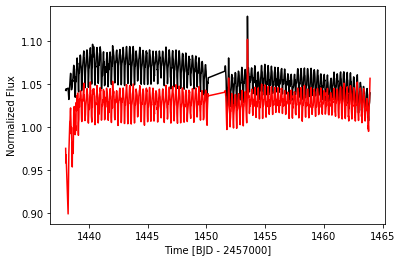

In [33]:
q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')

plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')

In [26]:
flux = data.corr_flux[q]
flux_cgs = flux *(u.electron/u.second)

In [32]:
flux_cgs.to(u.amp)

UnitConversionError: 'electron / s' and 'A' (electrical current) are not convertible